# Numerical Solutions to Initial Value Problems

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Value Problems

In an initial value problem (IVP), we have an ordinary differential equation (ODE) involving some unknown function $\mathbf{s}(t)$, a function of time $t$ and an initial condition specifying the value of the unknown function at some time $t_0$. (Note: IVP extend to problems beyond just time-dependent functions, but since so many problems in physics are time-depedent, it is useful to talk about them temporarily for an introduction). To make this concrete, an IVP is an ODE:

\begin{equation}
\dot{\mathbf{s}}(t) = f(t, \mathbf{s}(t))\,,
\label{eqn:ode}
\end{equation}

and some initial condition at time $t_0$:

\begin{equation}
\mathbf{s}(t_0) = \mathbf{s}_0\,.
\label{eqn:iv}
\end{equation}

Note that $\mathbf{s}(t)$ is a vector.

The function $f(t, \mathbf{s}(t))$, often referred to as the governing equation, determines the *physics* of the problem. Meanwhile, the initial conditions specifics the *specifics* of the solution we are seeking. You will see what is meant by these two statements with an example shortly.

In some cases, an IVP can be solved in *closed-form* using analytic techniques (e.g., if the ODE is separable, we can rearrange and then simply integrate, using the initial conditions to find a *specific solution*). However, oftentimes, when the physics is realistic, it is often easier to turn to a computer to look for a numerical solution. In this notebook, we will explore several approaches to solving IVPs using numerical approximation (also known as numerical integration/quadrature). First, let's set up an IVP for us to solve. 

## Simple Projectile Motion

Consider a projectile of mass $m$ fired at time $t_0=0$ with an initial speed $v_0$ an angle $\theta$ to the horizontal $x-y$ plane (i.e. the surface of the Earth) where the force of gravity is well-modelled by
\begin{equation}
\mathbf{F} = -mg \hat{z}\,.
\end{equation}
For simplicity, we will assume the mass is fired in the $x$-direction, such that the motion of projectile occurs entirely in the $x-z$ plane and we can neglect the $y$ coordinate throughout. Then, if $\mathbf{r}(t)$ is the position of the mass as a function of time, Newton's second law, provides the governing equation:
\begin{equation}
m \ddot{\mathbf{r}} = -mg \hat{z}\,.
\end{equation}
Or, written in component form:
\begin{eqnarray}
\ddot{x} &= 0 \\
\ddot{z} &= -g\,.
\end{eqnarray}

These form a pair of second-order differential equations. But, they are not in the form of Equation (1). We need to get we can apply a mathematical trick. Let

\begin{equation}
\mathbf{s}(t) = \left[\begin{array}{c} x \\ z \\ \dot{x} \\ \dot{z} \end{array}\right]
\end{equation}

then

\begin{equation}
\dot{\mathbf{s}}(t) = \left[\begin{array}{c} \dot{x} \\ \dot{z} \\ \ddot{x} \\ \ddot{z} \end{array}\right] =\left[\begin{array}{c} \dot{x} \\ \dot{y} \\ 0 \\ -g \end{array}\right]
\end{equation}

Finally, to make this an initial value problem, we also need our initial values. The initial values for the first derivative can be calculated from the information above, then we will also assume that the mass begins at coordinates $(x,z)=(0, 0)$. Hence,
\begin{equation}
\mathbf{s}(0) = \left[\begin{array}{c} 0 \\ 0 \\ v_0 \cos(\theta) \\ v_0\sin(\theta) \end{array}\right]
\end{equation}

### Solving by separation of variables

This problem is sufficiently easy that we can in fact solve it in closed-form using separation of variables. Since $x$ and $z$ are not coupled, we can solve them independently:
\begin{equation}
\ddot{x} = 0 \Rightarrow x(t) = v_0 \cos(\theta) t\,, 
\end{equation}
and
\begin{equation}
\ddot{z} = -g \Rightarrow z(t) = v_0 \sin(\theta) t - \frac{1}{2}gt^2 \,.  
\end{equation}
I.e., the regular SUVAT expressions (with the specific information for our initial value problem described above). 

<!---
#### For the $x$ coordinate

\begin{equation}
\ddot{x} = 0 \Rightarrow \dot{x}(t) = \dot{x}_0\, 
\end{equation}
where $\dot{x}_0$ is a constant. Since we are given that $\dot{x}(0) = v_0 \sin(\theta)$ and $\dot{x}(t)$ is a constant, it must also be true that $\dot{x}(t)=v_0\sin(\theta)$. Hence we have an ODE
\begin{equation}
\frac{dx}{dt} = v_0 \sin(\theta)
\end{equation}
which can be solved by separation of variables:
$$ \int dx = v_0 \sin(\theta) \int dt $$
$$ \Rightarrow x(t) = v_0 \sin(\theta) t + x_0 $$
then inserting our initial conditions,
\begin{equation}
x(t) = v_0 \sin(\theta) t
\end{equation}


#### For the $z$ coordinate

\begin{equation}
\ddot{z} = -g
\end{equation}
APplying the same 
-->

We will now create a function to calculate the closed-form trajectory at a specific set of times, given some values for the mass and initial velocity. 

In [3]:
def simple_projectile_motion_closed_form(time, v0, theta, mass, little_g=9.81):
    """ Calculates Eqn (10) and (11)
    
    Parameters
    ----------
    time: array
        An array of times (in seconds) at which to calculate the values
    v0: float
        The initial speed (in m/s) of the projectile
    theta: float
        The initial angle (in radians) of the projectile
    mass: float
        The mass (in kg) of the projectile
    little_g: float
        The local acceleration due to gravity (in m/s^2)
        
    Returns
    -------
    x(t), z(t): arrays
        A tuple of arrays with length equal to the input time array
    """
    x_of_t = v0 * np.cos(theta) * time
    z_of_t = v0 * np.sin(theta) * time - 0.5 * little_g * time ** 2
    return x_of_t, z_of_t

<div class="alert alert-block alert-info">
<b>Note:</b> The function defined above includes a <a href="https://peps.python.org/pep-0257/"> docstring</a>. This is a string of text which helps a user understand the inputs and expected outputs. For example, you may wonder if `theta` should be given in degrees of radians, usefully, the docstring tells us. Here, we use the <a href="https://numpydoc.readthedocs.io/en/latest/format.html">numpydoc </a> convention.
</div>

Let's quickly plot the projectile motion to check it all makes sense, we will label this the "Exact solution" for later comparison

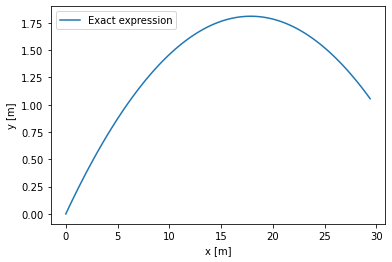

In [4]:
theta = 0.2
mass = 1
v0 = 30
time = np.linspace(0, 1, 100)
x_of_t, z_of_t = simple_projectile_motion_closed_form(time, v0, theta, mass)

fig, ax = plt.subplots()
ax.plot(x_of_t, z_of_t, label="Exact expression")
ax.set(xlabel="x [m]", ylabel="y [m]")
ax.legend()
plt.show()

### Solving numerically

While we already have a closed-form solution for the projectile motion, it nonetheless useful to look at how we can solve this problem numerically. This way, we can gain some confidence that we can obtain the correct solution (comparing with the closed-form expression).

We will start by using a numerical integrator, `solve_ivp` provided by `scipy.integrate`. The full documentation for this functions can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). For now, we can treat this as a **black-box** (i.e. assume it solves the IVP without worrying about the internals, we'll get to these shortly).

In [5]:
from scipy.integrate import solve_ivp

# Define our variables
theta = 0.2
mass = 1
v0 = 30
little_g = 9.81

def sdot_simple_projectile_motion(t, s):
    """ Implementation of Eq (2) for simple projectile motion (Eq 5 and 6)
    
    Parameters
    ----------
    t: array of length N
        The N times (in seconds) to evaluate sdot
    s: array of length 4
        The values of s(t) = [x, z, xdot, zdot]
        
    Returns
    -------
    sdot: array of length 4
        The values of sdot(t) = [xdot, zdot, xddot, zddot]
    """
    xdot = s[2]
    zdot = s[3]
    xddot = 0
    zddot = - little_g
    return np.array([xdot, zdot, xddot, zddot])

# Calculate initial conditions
s0 = np.array([0, 0, v0 * np.cos(theta), v0 * np.sin(theta)])

# Define a tuple of the span of times to integrate over
t_span = (0, 1)

# Define a tuple of the times at which to evaluate the solution
t_eval = np.linspace(0, 1, 100)

# Run solve_ivp
output = solve_ivp(sdot_simple_projectile_motion, t_span, s0, t_eval=t_eval)

# Extract solution from solve_ivp (see documentation for details)
x_of_t_numerical = output.y[0]
z_of_t_numerical = output.y[1]

Okay, let's check then if "solve_ivp" solution agrees with the exact solution

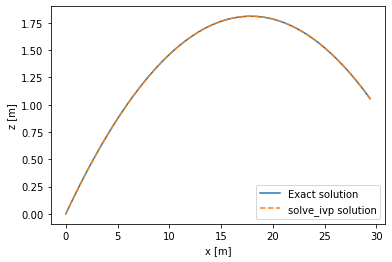

In [6]:
fig, ax = plt.subplots()
ax.plot(x_of_t, z_of_t, label="Exact solution")
ax.plot(x_of_t_numerical, z_of_t_numerical, ls='--', label="solve_ivp solution")
ax.set(xlabel="x [m]", ylabel="z [m]")
ax.legend()
plt.show()

## Do they agree exactly?

From the plot above, it looks like the two solutions agree exactly. But, is that really the case? To check, we need to look a little closer. We can do this by plotting out the residual `r_x = x_of_t - x_of_t_numerical` and `r_z = z_of_t - z_of_t_numerical`:

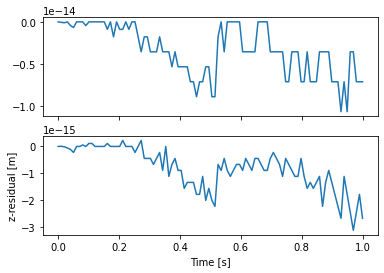

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
r_x = x_of_t - x_of_t_numerical
r_z = z_of_t - z_of_t_numerical
ax1.plot(t_eval, r_x)
ax2.plot(t_eval, r_z)
ax2.set(ylabel="z-residual [m]")
ax2.set(xlabel="Time [s]", ylabel="z-residual [m]")
plt.show()

We can see that there is some non-zero residual and it grows with time! A good way to quantify the total error is to calculate the ""mean squared error**. The general expression for the mean squared error between two vectors $\mathbf{v}$ and $\hat{\mathbf{v}}$ is

\begin{equation}
\textrm{MSE} = \frac{1}{N} \sum_{i=1}^{N} (v_i - \hat{v}_i)^2
\end{equation}

Let's calculate this for $x$ and $z$:

In [8]:
# Mean-squared error
MSE_x = np.mean(r_x**2)
MSE_z = np.mean(r_z**2)
print(f"The mean-squared error in x, and z in {MSE_x}, {MSE_z}")

The mean-squared error in x, and z in 1.960384060720346e-29, 1.2390686964334026e-30


Here we see that the total is small (relative say to the magnitude of $x$ and $z$)

## Writing an IVP solver 

There are many different numerical methods to solve ODEs. Above, we used the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) implementation from `scipy`. This is a very powerful tool which allows you access many algorithms in a uniform interface (for example, by default it uses the Runge-Kutta of order 5(4) algorithm). The development of such numerical integrators remains the subject of a lot of research with specialised methods for specific problems. 

We will now reveal the insides of `solve_ivp` by writing out own integrator using Euler's method, which was first published by Leonard Euler in the 1800's (you can guess that modern algorithms are quite advanced by comparison!).

### Euler's Method

Euler's method is the most basic *explicit* solver. Explicit means that all the calculations involved involve only calculating $f(t, s(t))$ at a later time than the current method. By comparison, *implicit* solvers involve calculations including the current time. Implicit methods involve extra computations, but are much more efficient under certain conditions.

Euler's method proceed as follows:
1. Choose a time step $h$
2. Start at the initial conditions $s(t_0) = s_0$
3. Set $t_1 = t_0 + h$
4. Estimate the value at the next step by $\tilde{s}_1 = s_0 + h f(t_0, s_0)$
5. Repeat with $t_{n+1} = t_n + h$ and $\tilde{s}_{n+1} = s_n + h f(t_n, s_n)$

## Challenges

You should now go to [the week 1 challenge problems](../Numerical_Solutions_to_Initial_Value_Problems_Challenges.ipynb).